In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read in the data，named loan
original_data= pd.read_csv('loan.csv', low_memory=False)

In [4]:
original_data.shape

(2260668, 145)

In [5]:
loan=original_data.copy()

In [6]:
#define traget. If loan_status is in the list of bad_indicators, target is 1, else 0

bad_indicators = ["Charged Off ",
 "Charged Off",
 "Default",
 "Does not meet the credit policy. Status:Charged Off",
 "In Grace Period",
 "Default Receiver",
 "Late (16-30 days)",
 "Late (31-120 days)"]

loan['target'] = loan['loan_status'].isin(bad_indicators).astype(int)

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 146 entries, id to target
dtypes: float64(105), int32(1), int64(4), object(36)
memory usage: 2.5+ GB


The data has 2260668 rows and 146 columns 

In [8]:
# Display all columns when looking at summary statistics
pd.set_option('display.max_columns', None)

In [9]:
# Look at the summary statistics of numerical variables
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term,target
count,0.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,0.0,2.258957e+06,2.260639e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10613.0,10613.000000,10613.0,10613.000000,8426.000000,10613.000000,10613.000000,33056.000000,33056.000000,33056.000000,2.260668e+06
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309291e+01,4.458076e+02,7.799243e+04,NaN,1.882420e+01,3.068792e-01,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.446293e+03,4.445295e+03,1.182403e+04,1.180594e+04,9.300142e+03,2.386352e+03,1.462469e+00,1.360740e+02,2.259328e+01,3.364015e+03,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.477304e+00,2.036667e+00,4.521656e+00,1.354780e+04,1.139426e+04,5.789995e+01,8.464413e-03,1.236983e+01,1.257378e+02,1.814916e+02,1.402409e+01,8.297469e+00,1.555382e+00,2.484485e+01,39.303090,7.024194e+00,35.7822

There is no value in neither id nor member_id for all the observations. They might have been removed to protect client privacy.

Therefore I will drop these 2 columns

In [10]:
loan.drop(['id','member_id'],axis=1,inplace=True)

In [11]:
# Now look at the summary of categorical variables
loan.describe(exclude='number')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,2260668,2260668,2260668,2093699,2113761,2260668,2260668,2260668,2260668,2260668,126067,2260668,2237343,2260667,2260668,2260639,2260668,2258242,957061,2260595,2260668,115730,108021,2260668,10613,10613,10613,10613,10613,10613,10613,2260668,2260668,33056,33056,33056
unique,2,7,35,512694,11,6,3,139,9,2,124501,14,63155,956,51,754,2,135,105,140,2,3,663,2,1,9,3,26,27,26,5,2,2,82,3,89
top,36 months,B,C1,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2016,Fully Paid,n,,debt_consolidation,Debt consolidation,112xx,CA,Sep-2004,w,Feb-2019,Mar-2019,Feb-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,COMPLETED,Sep-2017,Dec-2017,Sep-2017,Late (16-30 days),Cash,N,Feb-2019,ACTIVE,Jan-2019
freq,1609754,663557,145903,38824,748005,1111450,886231,61992,1041952,2259986,252,1277877,1153293,23908,314533,15400,1535467,934725,953821,1398266,2139958,57403,998,2259783,10613,2965,7541,2444,1756,1715,4622,2182546,2227612,2730,14811,1725


In [12]:
#Check if any of the variables has extremely large percentage of missing values
#Return the percentage of missing values in each of the non-numerical variable
loan_missing=loan.isna()
loan_missing.sum()/len(loan)*100

loan_amnt                                       0.000000
funded_amnt                                     0.000000
funded_amnt_inv                                 0.000000
term                                            0.000000
int_rate                                        0.000000
installment                                     0.000000
grade                                           0.000000
sub_grade                                       0.000000
emp_title                                       7.385826
emp_length                                      6.498389
home_ownership                                  0.000000
annual_inc                                      0.000177
verification_status                             0.000000
issue_d                                         0.000000
loan_status                                     0.000000
pymnt_plan                                      0.000000
url                                           100.000000
desc                           

A few columns have way too much missing data. For example, 99.53% of hardship_flag is missing insights. Although generally speaking, xgboost can handle sparse data well, a variable with extreme large portion of data no longer carry much statistical insight. Therefore I will remove those with 50% or higher of missing values. By setting the treshold to 50%, I will only keep columns
that have values more than not.

In [13]:
loan.drop(loan.columns[loan_missing.sum()/len(loan) >= 0.5],axis=1,inplace=True)

In [14]:
loan.shape
#42 variables with more than 50% of missing values were removed

(2260668, 102)

In [15]:
len(loan.columns[loan.isna().sum()>0])

69

As mentioned earlier, since xgboost can handle missing data, I will not impute the missing values at this point.

Notice that there are 512694 unique values in emp_title
See how many of the employee titles appear less than 5 times in the dataset

In [16]:
sum(loan['emp_title'].value_counts()<5)/len(loan['emp_title'].value_counts())

0.9355365968784499

In [17]:
#look at the string/categorical variables 
loan.describe(exclude='number')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
count,2260668,2260668,2260668,2093699,2113761,2260668,2260668,2260668,2260668,2260668,2260668,2237343,2260667,2260668,2260639,2260668,2258242,2260595,2260668,2260668,2260668,2260668
unique,2,7,35,512694,11,6,3,139,9,2,14,63155,956,51,754,2,135,140,2,2,2,2
top,36 months,B,C1,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2016,Fully Paid,n,debt_consolidation,Debt consolidation,112xx,CA,Sep-2004,w,Feb-2019,Feb-2019,Individual,N,Cash,N
freq,1609754,663557,145903,38824,748005,1111450,886231,61992,1041952,2259986,1277877,1153293,23908,314533,15400,1535467,934725,1398266,2139958,2259783,2182546,2227612


In [18]:
#See the distribution of loan_status in percentage
loan['loan_status'].value_counts()/len(loan)*100

Fully Paid                                             46.090448
Current                                                40.682444
Charged Off                                            11.574234
Late (31-120 days)                                      0.968608
In Grace Period                                         0.395989
Late (16-30 days)                                       0.165305
Does not meet the credit policy. Status:Fully Paid      0.087939
Does not meet the credit policy. Status:Charged Off     0.033663
Default                                                 0.001371
Name: loan_status, dtype: float64

In [19]:
#See the distribution of the purposes of loans
loan['purpose'].value_counts()/len(loan)*100

debt_consolidation    56.526522
credit_card           22.868064
home_improvement       6.655422
other                  6.168088
major_purchase         2.231420
medical                1.215924
small_business         1.092111
car                    1.062208
vacation               0.686744
moving                 0.681347
house                  0.625302
wedding                0.104173
renewable_energy       0.063919
educational            0.018756
Name: purpose, dtype: float64

Now we need to convert charateristic and categorical variables into numerical variables for xgBoost.
There are two ways to convert a variable into numeric, lable encoding and one-hot encoding(creating dummy variables). 

For this dataset ,it is not practical to create dummy variables for columns that have large amount of levels, for example, emp_title and title. To keep reasonable dimensions of the dataset, I will use label encoding.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
loan_obj_colnames=loan.select_dtypes(include='object').columns.tolist()
loan[loan_obj_colnames]=loan[loan_obj_colnames].astype(str)
loan[loan_obj_colnames]=loan[loan_obj_colnames].apply(le.fit_transform)


In [21]:
#Now all should be numeric
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 102 entries, loan_amnt to target
dtypes: float64(75), int32(23), int64(4)
memory usage: 1.5 GB


In [22]:
#Define x and y variables
y=loan.loc[:,'target']
x=loan.loc[:,loan.columns!='target']

In [23]:
#split training data and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [24]:
#Fit xgboost model
from xgboost import XGBClassifier
xgbmodel=XGBClassifier()
xgbmodel.fit(x_train,y_train)
print(xgbmodel)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [25]:
#predict y_pred with x_test
y_pred=xgbmodel.predict(x_test)

In [26]:
#get accuracy rate
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9999879359964398


In [27]:
#get confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[647768      0]
 [     9  98244]]


We can see from the confusion matrix that the false positve =0 and false negative = 9
In the case of our research, we are interested in the sensitivity(true positive rate) because we want to detect
those in the target list for current or potential bad loans. Our sensitivity is:

In [28]:
print(98244/(98244+9)*100,'%')

99.99083997435193 %


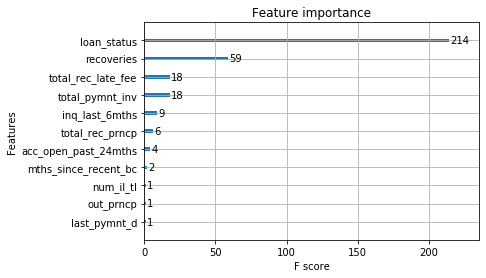

In [29]:
#Plot feature importance
from xgboost import plot_importance
plot_importance(xgbmodel)

The importance graph shows that loan_status, recoveries, total_rec_late_fee, inq_last_6mths and next_pymnt_d are the top 5 most important features.

It is not surprising to see that loan_status is the most leading feature since we derived our dependent variable solely basing on loan_status


In [30]:
#Try to run the model again without loan_status
x2=loan.drop(columns=['target','loan_status'])

In [31]:
x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=0.33,random_state=42)

In [32]:
xgbmodel2=XGBClassifier()
xgbmodel2.fit(x2_train,y_train)
print(xgbmodel)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [33]:
y2_pred=xgbmodel2.predict(x2_test)
accuracy=accuracy_score(y_test,y2_pred)
print(accuracy)

0.9873488815998477


In [34]:
print(confusion_matrix(y_test,y2_pred))

[[646328   1440]
 [  7998  90255]]


In [35]:
#Similarly, we are interested in the sensitivity
print(90255/(90255+7998)*100,'%')

91.85979054074684 %


Sensitivity rate drops from 99.9908% to 91.8598%

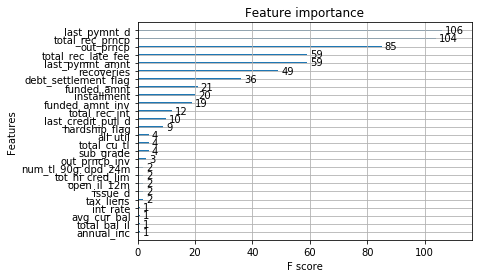

In [36]:
#feature selection
plot_importance(xgbmodel2)

Now last_pymnt_d, total_rec_prncp,out_prncp,total_rec_late_fee and last_pymnt_amnt are the top 5 most important features.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
#Implement PCA
from sklearn.decomposition import PCA
#I choose to find the minimum number of principal components such that 95% of the variance is retained
pca=PCA(.95)

Things that can be imporved about this project:

1. The data contains large amount of missing values. Such situation significantly damages the performance for unsupervised learning such as PCA and K mean clustering. It would require business domain knowledge to design the optimal map for data imputaion for this dataset which has more than 60% of the columns with missing data. Once the data is cleaned, we can consider more dimention reduction models. 


2. There are categorical and characteristic variables with large volume of levels. I am not able to one-hot encode them due to my computer's limited computational ability. Furthermore, even if they could be encoded as dummy variables, with each level being a separete dummy variable, it will contribute little to xgboost model. They will be very unlikely to be used at early splits in the model and the expanded dataset dimensions seriously reduce the speed of our computation. My recommendation is to create super categories, for example, instead of recording each person's job, cluster them by industry or company to reduce the number of levels included in each variable. From a business perspective, we can also create a prefixed list of choices for our clients to check on, and that will help reduce the size of the variable when we load customer information into our dataset.


3. Since last_pymnt_d was selected as the most important feature in our second xgboost model, we can consider utilizing the columns with date information to study if there is seasonality behind default. With the zipcode, we can also study if geological feature plays a role in detecting default. If so, we could be more cautious on loan applications from those areas.  